<center><font size="5"><b><I>Discovering the beyond💫✨</I></b></font> </center>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import plotly.express as px

from datetime import datetime, timedelta

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import train_test_split 
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report
from sklearn import tree
from imblearn.over_sampling import SMOTE 

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = [15,8]

# Dataset Information

The Sloan Digital Sky Survey offers public data of space observations. Observations have been made since 1998 and have been made accessible to everyone.<br><br>
For this purpose a special 2.5 m diameter telescope was built at the Apache Point Observatory in New Mexico, USA. The telescope uses a camera of 30 CCD-Chips with 2048 x 2048 image points each. The chips are ordered in 5 rows with 6 chips in each row. Each row observes the space through different optical filters (u, g, r, i, z) at wavelengths of approximately 354, 476, 628, 769, 925 nm.

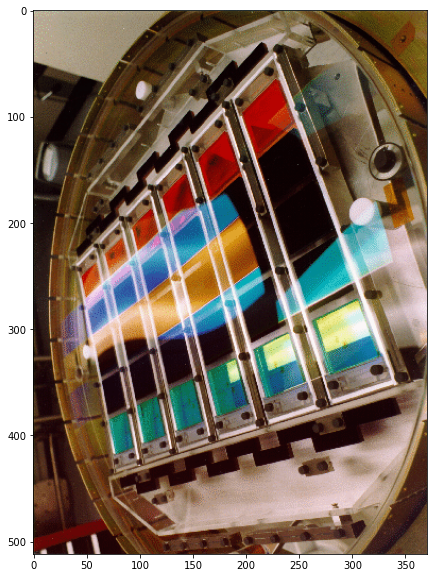

In [3]:
plt.figure(figsize=(20,10))
img1 = plt.imread('CCDs_filters1.gif')
plt.imshow(img1)

# Attribute Information

<H3>About dataset</H3>

<ul>
    
<li><b>objid</b> : Object Identifier</li>

<li><b>right_asc</b> : Right Ascension. It is the angular distance of a particular point measure from East to west. It is analogous to longitude on Earth. 

<li><b>declination</b> : Declination. It is the angular distance of a point north or south of the celestial equator. It is measured in degrees. Analogous to latitude on Earth.

<li><b>u_band, g_band, r_band, i_band, z_band</b> : represents the different wavelengths used to capture the observations. The bands are Ultraviolet, Green, Red, Near-infrared and Infrared respectively.
The SDSS imaging camera takes images in five filters: u,g,r,i,z. Each letter designates a section of light of the electromagnetic spectrum.

<li><b>run</b> : Run Number, which indentifies the specific scan

<li><b>rerun</b> : Rerun Number, tells us how the image has been processed

<li><b>camcol</b> : Camera column. The SDSS camera had six parallel camera columns, meaning that each run is divided into six parallel scanlines, one for each camera column. These images are known as camcols, and are numbered 1 through 6.

<li><b>field</b> : Field number. A field is a part of a camcol that is processed by the Photo pipeline at one time. Fields are 2048x1489 pixels. A field consists of the frames in the 5 filters for the same part of the sky.
</ul>

Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels.

<ul>

<li><b>specobjid</b> : Object Identifier

<li><b>redshift</b> : It is a ratio of the obseved wavelength and a reference wavelength. The wavelength at which the radiation is originally emitted from the space object is lengthened as it travels through space. Using this one can understand how far the space objects are.

<li><b>mod_julian_date</b> : Modified Julian Date is the number of days passed since November 17th 1858. This date tells us when the record was taken.

<li><b>fiberid</b> : fiber ID. It gives the specific optical fiber chosen to record the observation.

<li><b>plate</b> : plate number. It gives the specfic plate number of the SDSS camera used to record observations.

</ul>

<H4>Target Variable</H4>

The target variable is 'class' which has 3 categories:
<ul>
<li><b>Star</b>: It is a type of astronomical object consisting of a luminous spheroid of plasma held together by its own gravity. The nearest star to Earth is the Sun.<br><br>
    
<li><b>Galaxy</b>: It is a huge collection of gas, dust, and billions of stars and their solar systems, all held together by gravity. We are a part of the milky way galaxy.<br><br>

<li><b>QS0(Quasar)</b>: It is an astronomical object of very high luminosity found in the centres of some galaxies and it is powered by gas spiraling at high velocity into an extremely large black hole.
</ul>

# Problem Statement

The aim of our model is to classify observations of space objects into a star, a galaxy or a quasar.

# Data Preprocessing

In [4]:
data = pd.read_csv('sky_survey_project_final_datasetnew.csv')#read the dataset
data.shape

(100000, 18)

In [5]:
data.head() #first 5 observations

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1237666301628060000,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,4849,301,5,771,8168632633242440000,STAR,0.000115,7255,56597,832
1,1237673706652430000,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,6573,301,6,220,9333948945297330000,STAR,-0.000093,8290,57364,868
2,1237671126974140000,172.756623,-8.785698,16.47714,15.31072,15.55971,15.72207,15.82471,5973,301,1,13,3221211255238850000,STAR,0.000165,2861,54583,42
3,1237665441518260000,201.224207,28.771290,18.63561,16.88346,16.09825,15.70987,15.43491,4649,301,3,121,2254061292459420000,GALAXY,0.058155,2002,53471,35
4,1237665441522840000,212.817222,26.625225,18.88325,17.87948,17.47037,17.17441,17.05235,4649,301,3,191,2390305906828010000,GALAXY,0.072210,2123,53793,74


In [6]:
data.tail() #last 5 observations

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
99995,1237667968033620000,228.674917,19.179460,19.32631,18.82748,18.65659,18.60481,18.60917,5237,301,5,134,4448615345201370000,QSO,0.438182,3951,55681,672
99996,1237664818210470000,173.757382,36.441603,18.33687,17.30365,17.16037,17.14895,17.14419,4504,301,2,111,2265404129658560000,STAR,-0.000497,2012,53493,340
99997,1237664295297290000,205.426531,38.499053,17.50690,15.63152,15.22328,15.04469,15.28668,4382,301,4,97,2257446413900210000,GALAXY,0.004587,2005,53472,62
99998,1237656537513130000,337.135144,-9.635967,19.33946,17.21436,16.29697,15.86745,15.51556,2576,301,2,105,811847537492257000,GALAXY,0.084538,721,52228,268
99999,1237670459113730000,37.440188,25.400888,18.11769,16.86279,16.31057,16.07582,15.94701,5817,301,5,120,2678586035360790000,STAR,-0.000085,2379,53762,255


In [7]:
#Renaming columns
data.rename(columns={'ra':'right_asc','dec':'declination','u':'u_band','g':'g_band','r':'r_band','i':'i_band',
                     'z':'z_band','mjd':'mod_julian_date'},inplace=True)
data.columns

Index(['objid', 'right_asc', 'declination', 'u_band', 'g_band', 'r_band',
       'i_band', 'z_band', 'run', 'rerun', 'camcol', 'field', 'specobjid',
       'class', 'redshift', 'plate', 'mod_julian_date', 'fiberid'],
      dtype='object')

<H4>Removing insignificant features</H4>

In [8]:
data.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid'], axis=1, inplace=True)

data.head(1)

,right_asc,declination,u_band,g_band,r_band,i_band,z_band,class,redshift,plate,mod_julian_date,fiberid
0,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,STAR,0.000115,7255,56597,832


<b>objid</b> and <b>specobjid</b> are just identifiers for accessing a specific records. Therefore we will not need them for classification as they are not related to the outcome.<br><br>
The features <b>'run','rerun', 'camcol'</b> and <b>'field'</b> are values which describe parts of the camera used at SDSS when making observations. These are not essential to our analysis.

In [9]:
data.info() #checking the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   right_asc        100000 non-null  float64
 1   declination      100000 non-null  float64
 2   u_band           100000 non-null  float64
 3   g_band           100000 non-null  float64
 4   r_band           100000 non-null  float64
 5   i_band           100000 non-null  float64
 6   z_band           100000 non-null  float64
 7   class            100000 non-null  object 
 8   redshift         100000 non-null  float64
 9   plate            100000 non-null  int64  
 10  mod_julian_date  100000 non-null  int64  
 11  fiberid          100000 non-null  int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 9.2+ MB


<b>There are 11 numerical features and 1 categorical feature. </b>

In [10]:
data.isnull().sum() #checking the missing values if present

right_asc          0
declination        0
u_band             0
g_band             0
r_band             0
i_band             0
z_band             0
class              0
redshift           0
plate              0
mod_julian_date    0
fiberid            0
dtype: int64

<b>No missing values present</b>

# Data Visualization

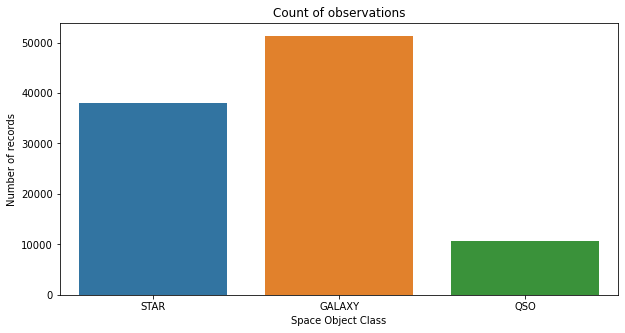

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(data['class'])
plt.xlabel('Space Object Class')
plt.ylabel('Number of records')
plt.title('Count of observations')
plt.show()

<b>Interpretation: This chart tells us the number of records in each space object class. Galaxy has the highest count of records while Quasars have the least.</b>

<h4>Variation in the right ascension for Stars, Galaxies and Quasars</h4>

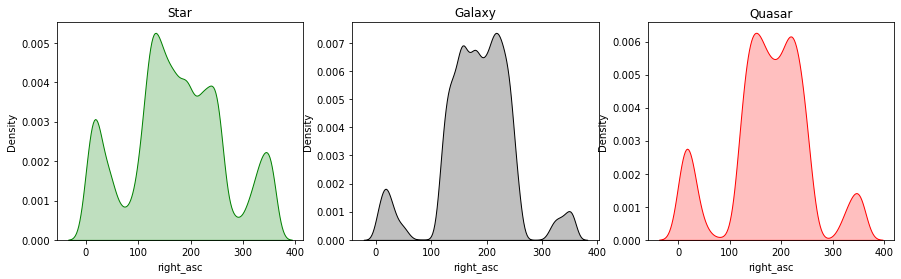

In [12]:
fig, axs = plt.subplots(1, 3,figsize=(15, 4))

ax = sns.kdeplot(data[data['class']=='STAR'].right_asc, ax = axs[0],color='green',shade=True)
ax.set_title('Star')

ax = sns.kdeplot(data[data['class']=='GALAXY'].right_asc, ax = axs[1],color='black',shade=True)
ax.set_title('Galaxy')

ax = sns.kdeplot(data[data['class']=='QSO'].right_asc, ax = axs[2],color='red',shade=True)
ax.set_title('Quasar')

plt.show()

<b>Interpretation: All 3 graphs have a nearly normal distribution with most of its values having a high right ascension values.</b>

<h4>To visualize the timeline of discovery for different space objects</h4>

In [13]:
timeline_stars  = data.loc[data['class']=='STAR'  , 'mod_julian_date']
timeline_galaxy = data.loc[data['class']=='GALAXY', 'mod_julian_date']
timeline_qso    = data.loc[data['class']=='QSO'   , 'mod_julian_date']

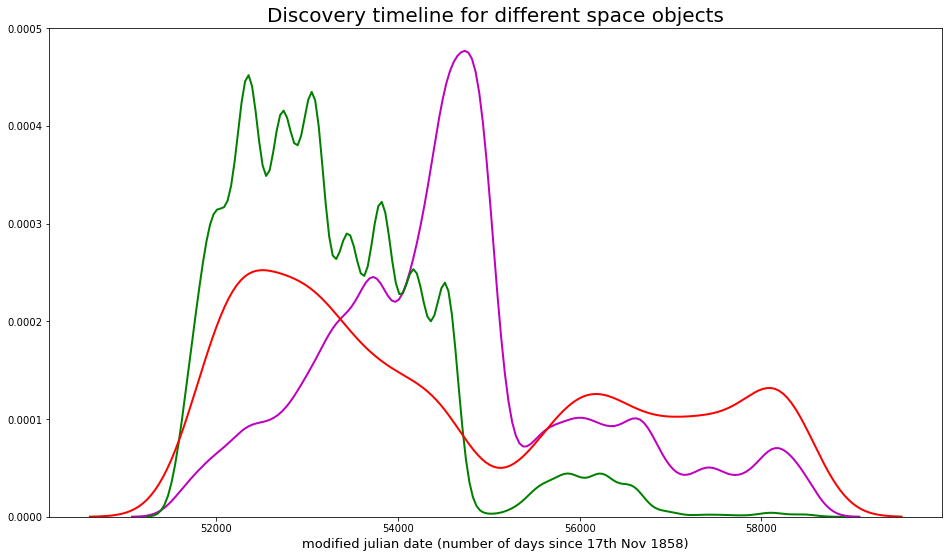

In [14]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.distplot(timeline_stars , hist=False, label='STAR'  , ax=ax,color='m',kde_kws={'linewidth':2})
sns.distplot(timeline_galaxy, hist=False, label='GALAXY', ax=ax,color='g',kde_kws={'linewidth':2})
sns.distplot(timeline_qso   , hist=False, label='QSO'   , ax=ax,color='r',kde_kws={'linewidth':2})

plt.title("Discovery timeline for different space objects",fontdict={'fontsize':20})
plt.xlabel('modified julian date (number of days since 17th Nov 1858)',fontdict={'fontsize':13})
plt.ylabel('')
plt.show()

<b>Interpretation: We can see that there is sudden increase in the number of Galaxy as well as quasars discovered around 52000 MJD (that is April 1st 2001)<br><br> The discovery of stars increased around 54500 MLD (in the year 2008). </b>

<h4>How does the declination angle vary for a star, galaxy and a quasar?</h>

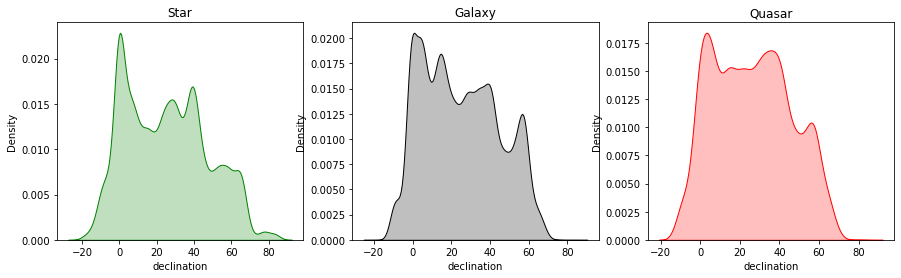

In [15]:
fig, axs = plt.subplots(1, 3,figsize=(15, 4))

ax = sns.kdeplot(data[data['class']=='STAR'].declination, ax = axs[0],color='green',shade=True)
ax.set_title('Star')

ax = sns.kdeplot(data[data['class']=='GALAXY'].declination, ax = axs[1],color='black',shade=True)
ax.set_title('Galaxy')

ax = sns.kdeplot(data[data['class']=='QSO'].declination, ax = axs[2],color='red',shade=True)
ax.set_title('Quasar')

plt.show()

<b>Interpretation: The declination angle for most of these three space objects have a large range from negative values to nearly 70 degrees</b>

<H4>Variation in Band Wavelength for different space objects</H4>

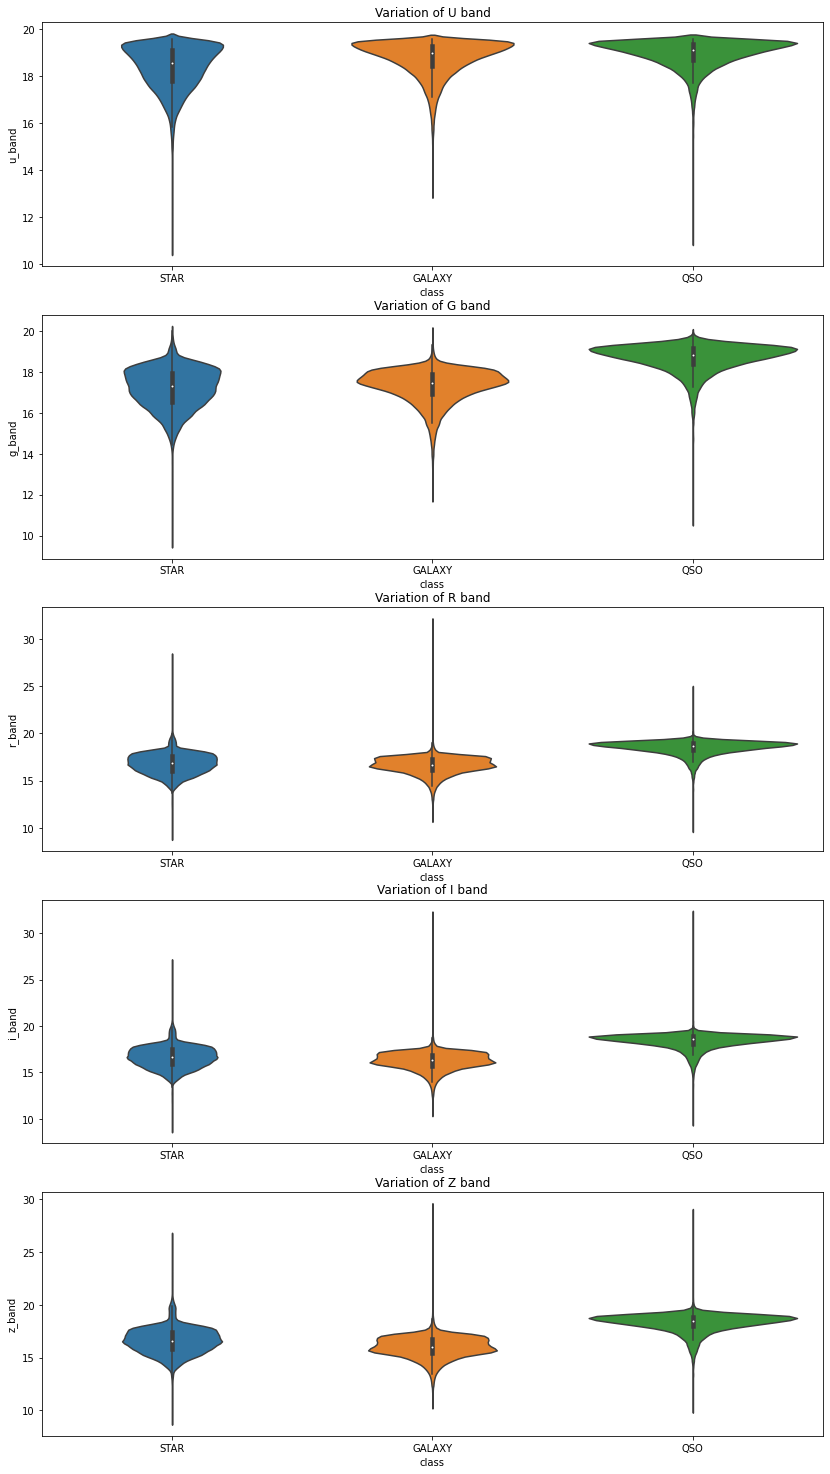

In [16]:
fig, axs = plt.subplots(5, 1,figsize=(14, 26))

ax = sns.violinplot(x=data['class'],y=data['u_band'], ax = axs[0])
ax.set_title('Variation of U band')

ax = sns.violinplot(x=data['class'],y=data['g_band'], ax = axs[1])
ax.set_title('Variation of G band')

ax = sns.violinplot(x=data['class'],y=data['r_band'], ax = axs[2])
ax.set_title('Variation of R band')

ax = sns.violinplot(x=data['class'],y=data['i_band'], ax = axs[3])
ax.set_title('Variation of I band')

ax = sns.violinplot(x=data['class'],y=data['z_band'], ax = axs[4])
ax.set_title('Variation of Z band')


plt.show()

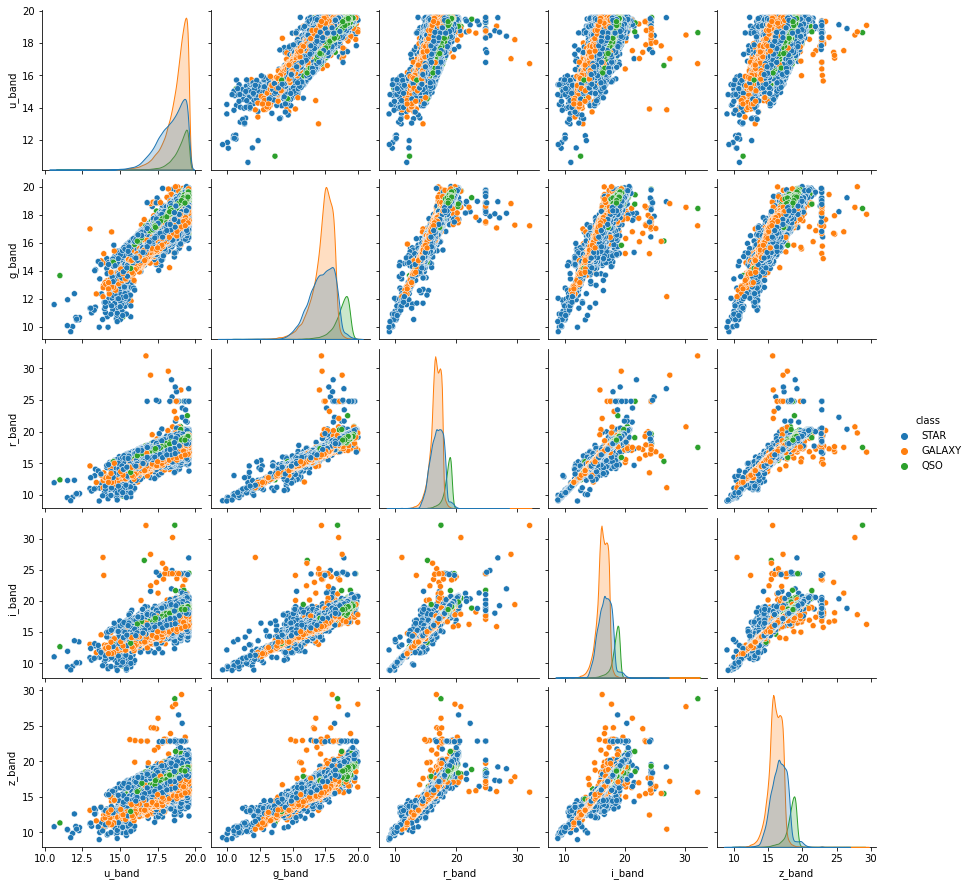

In [17]:
sns.pairplot(data[['u_band','g_band','r_band','i_band','z_band','class']], hue='class')

<b>Interpretation: The pairplot shows us the correlation between all 5 wavelengths for stars, galaxies and quasars.<br> <br>All wavelength radiations are strongly correlated. Also, Hotter objects emit more at every wavelength.</b>

# Correlation

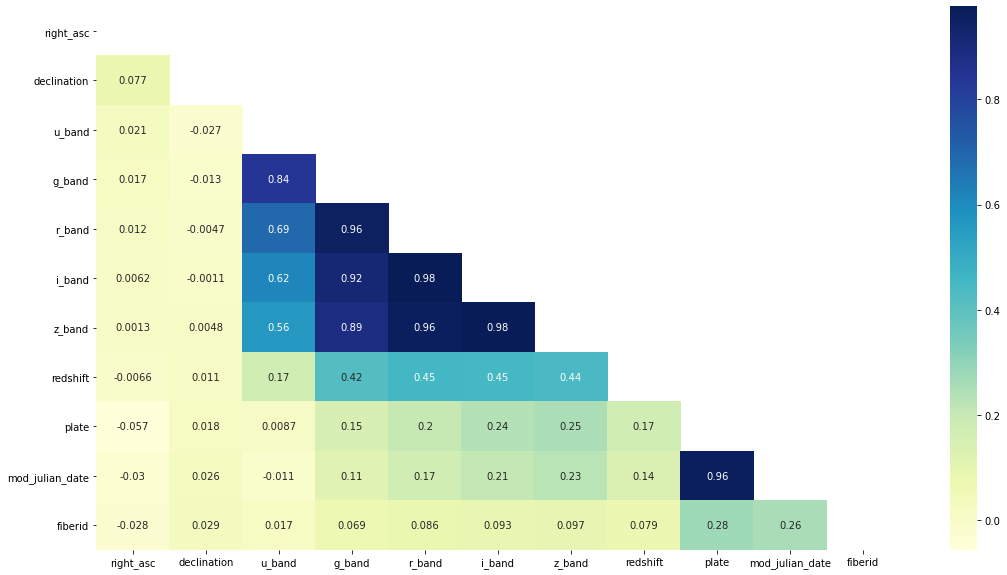

In [18]:
plt.figure(figsize=(18,10))
correlation = data.corr()
mask = np.triu(np.ones_like(correlation))
sns.heatmap(correlation,cmap="YlGnBu", annot=True, mask=mask)
plt.show()

<b>Interpretation: Generally, The u, g, r, i and z bands have wavelength values very close to eachother. This is the reason for such high correlation among features. From the domain perspective, these variables are very important for our analysis, due to which we have not removed them.</b>

# Data Encoding

In [19]:
data1 = data.copy() #copy of the original dataset

In [20]:
# instantiate the encoder with the list of categories in the required order
orderencoding = OrdinalEncoder(categories = [["GALAXY", "STAR", "QSO"]])

# add a column of ordered labels
# reshape(-1, 1): to rearrange the data
data1['class'] = orderencoding.fit_transform(data1['class'].values.reshape(-1,1))

# display the data
data1['class'].value_counts()

0.0    51323
1.0    38096
2.0    10581
Name: class, dtype: int64

In [21]:
data1.head(2) #checking

,right_asc,declination,u_band,g_band,r_band,i_band,z_band,class,redshift,plate,mod_julian_date,fiberid
0,47.372545,0.820621,18.69254,17.13867,16.55555,16.34662,16.17639,1.0,0.000115,7255,56597,832
1,116.303083,42.455980,18.47633,17.30546,17.24116,17.32780,17.37114,1.0,-0.000093,8290,57364,868


# Separating Predictor and Target Variables

In [22]:
df_features1=data1.drop(columns = ['class'],axis=1)   

In [23]:
df_target1 = data1['class']

<h1>Feature Scaling</h1>

In [24]:
X_scaler = StandardScaler()
feature_scaled1 = X_scaler.fit_transform(df_features1)
df_features_scaled1 = pd.DataFrame(feature_scaled1, columns = df_features1.columns)
df_features_scaled1.head()

,right_asc,declination,u_band,g_band,r_band,i_band,z_band,redshift,plate,mod_julian_date,fiberid
0,-1.667639,-1.178162,0.065633,-0.272293,-0.287759,-0.230598,-0.226791,-0.389669,2.111259,1.734118,2.258748
1,-0.784352,0.846200,-0.194147,-0.103121,0.317192,0.580613,0.705310,-0.390143,2.579472,2.229841,2.424595
2,-0.060948,-1.645233,-2.596213,-2.126356,-1.166443,-0.746957,-0.501159,-0.389555,0.123507,0.432443,-1.380672
3,0.303841,0.180834,-0.002769,-0.531149,-0.691260,-0.757044,-0.805267,-0.257025,-0.265087,-0.286258,-1.412920
4,0.452395,0.076489,0.294775,0.479099,0.519436,0.453794,0.456601,-0.224904,-0.210349,-0.078145,-1.233253


<h1>Model Building</h1>

In [25]:
#BASE

<h2>Train Test Split</h2>

In [26]:
X1 = df_features_scaled1
Y1 = df_target1

In [27]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, random_state = 2, test_size = 0.3)

print('X_train', X_train1.shape)
print('y_train', y_train1.shape)


print('X_test', X_test1.shape)
print('y_test', y_test1.shape)

X_train (70000, 11)
y_train (70000,)
X_test (30000, 11)
y_test (30000,)


<h3>Performing SMOTE</h3>

In [28]:
df_target1.value_counts()#data is imbalanced

0.0    51323
1.0    38096
2.0    10581
Name: class, dtype: int64

In [29]:
sm1 = SMOTE(random_state=42)
X_sm1, Y_sm1 = sm1.fit_resample(X_train1, y_train1)
Y_sm1.value_counts()

0.0    35940
1.0    35940
2.0    35940
Name: class, dtype: int64

In [30]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report_1(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred1 = model.predict(X_test1)

    # return the classification report for test data
    return(classification_report(y_test1, test_pred1))

In [31]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report_2(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred2 = model.predict(X_test2)

    # return the classification report for test data
    return(classification_report(y_test2, test_pred2))

In [32]:
#--------------------------------------------------------------------------------------------------------------------------

# K Nearest Neighbour Classifier

In [33]:
# define the K nearest neighbours model
knc1 = KNeighborsClassifier()

# train our K nearest neighbours model with the x and y training sets
knc1.fit(X_sm1,Y_sm1)

# compute the performance measures on test data

test_report_knc1 = get_test_report_1(knc1.fit(X_sm1,Y_sm1))

# print the performace measures
print(test_report_knc1)

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93     15383
         1.0       0.93      0.91      0.92     11475
         2.0       0.91      0.94      0.92      3142

    accuracy                           0.93     30000
   macro avg       0.92      0.93      0.92     30000
weighted avg       0.93      0.93      0.93     30000



In [34]:
# apply the model on unseen testing data

knc_preds1 = knc1.predict(X_test1)

print("Accuracy of K-Nearest Neighbour Classifier:", metrics.accuracy_score(y_test1, knc_preds1))

Accuracy of K-Nearest Neighbour Classifier: 0.9262333333333334


In [35]:
def plot_confusion_matrix_1(model):

    y_pred1 = model.predict(X_test1)

    cm1 = confusion_matrix(y_test1, y_pred1)

    conf_matrix1 = pd.DataFrame(data = cm1,columns = ['Predicted: S','Predicted: G','Predicted: Q'], index = ['Actual: S','Actual: G','Actual: Q'])
    
    plt.figure(figsize = (5,5))
    sns.heatmap(conf_matrix1, annot = True, fmt = 'd', cmap = 'binary', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':20})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 14)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 14)

    # display the plot
    plt.show()

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1, knc_preds1)

array([[14347,   779,   257],
       [  939, 10499,    37],
       [  151,    50,  2941]], dtype=int64)

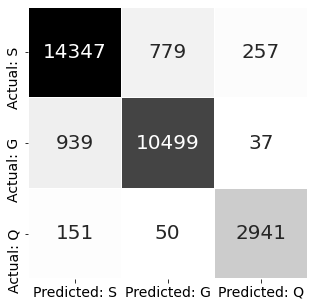

In [37]:
plot_confusion_matrix_1(knc1.fit(X_sm1,Y_sm1))

In [38]:
results = pd.DataFrame({
    'Base_Model_Type': ['KNN classifier scores'],
    'Accuracy': [metrics.accuracy_score(y_test1, knc_preds1)*100],
     'Macro F-1 score':[metrics.f1_score(y_test1, knc_preds1,average='macro')],
     'weighted F-1 score':[metrics.recall_score(y_test1, knc_preds1,average='weighted')],
      'Macro recall_score':[metrics.recall_score(y_test1, knc_preds1,average='macro')],
       'weighted recall_score':[metrics.f1_score(y_test1, knc_preds1,average='weighted')],
       'Macro precision_score':[metrics.precision_score(y_test1, knc_preds1,average='macro')],
        'weighted precision_score':[metrics.precision_score(y_test1, knc_preds1,average='weighted')]})

result_df = results
result_df = result_df.set_index('Base_Model_Type')
result_df

,Accuracy,Macro F-1 score,weighted F-1 score,Macro recall_score,weighted recall_score,Macro precision_score,weighted precision_score
Base_Model_Type,,,,,,,
KNN classifier scores,92.623333,0.924747,0.926233,0.927875,0.926222,0.921776,0.926284


Above Table gives the results of the KNN classifier base model. A 92.62% accuracy is a good value but it can be improved. To do this we have worked on 3 ensemble techniques. Doing this we can compare the performance of each ensemble technique and pick the best one fit for our model.

# Ensemble Techniques to improve the model

### 1. Random Forest Classifier

In [39]:
# define our random forest classifier
rfc1 = RandomForestClassifier()

# train the model using the x and y training sets
rfc1.fit(X_sm1,Y_sm1)

# compute the performance measures on test data
# call the function 'get_test_report'
from sklearn.metrics import classification_report
test_report_rfc1 = get_test_report_1(rfc1.fit(X_sm1,Y_sm1))

# print the performace measures
print(test_report_rfc1)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     15383
         1.0       1.00      1.00      1.00     11475
         2.0       0.98      0.96      0.97      3142

    accuracy                           0.99     30000
   macro avg       0.99      0.98      0.99     30000
weighted avg       0.99      0.99      0.99     30000



In [40]:
# apply the model on unseen testing data
rfc_preds1 = rfc1.predict(X_test1)

print("Accuracy of Random Forest Classifier:", metrics.accuracy_score(y_test1, rfc_preds1))

Accuracy of Random Forest Classifier: 0.9917666666666667


In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1, rfc_preds1)

array([[15276,    34,    73],
       [   14, 11461,     0],
       [  125,     1,  3016]], dtype=int64)

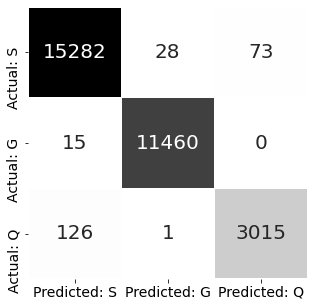

In [42]:
plot_confusion_matrix_1(rfc1.fit(X_sm1,Y_sm1))

In [43]:
results_rfc = pd.DataFrame({
    'Ensemble Model Type': ['Random Forest Classifier'],
    'Accuracy': [metrics.accuracy_score(y_test1, rfc_preds1)*100],
     'Macro F-1 score':[metrics.f1_score(y_test1, rfc_preds1,average='macro')],
     'weighted F-1 score':[metrics.recall_score(y_test1, rfc_preds1,average='weighted')],
      'Macro recall_score':[metrics.recall_score(y_test1, rfc_preds1,average='macro')],
       'weighted recall_score':[metrics.f1_score(y_test1, rfc_preds1,average='weighted')],
       'Macro precision_score':[metrics.precision_score(y_test1, rfc_preds1,average='macro')],
        'weighted precision_score':[metrics.precision_score(y_test1, rfc_preds1,average='weighted')]})

result_df_rfc = results_rfc
result_df_rfc = result_df_rfc.set_index('Ensemble Model Type')
result_df_rfc

,Accuracy,Macro F-1 score,weighted F-1 score,Macro recall_score,weighted recall_score,Macro precision_score,weighted precision_score
Ensemble Model Type,,,,,,,
Random Forest Classifier,99.176667,0.985981,0.991767,0.983907,0.991743,0.988102,0.991737


### 2. AdaBoost classifier

In [44]:
from sklearn.ensemble import AdaBoostClassifier
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each code implementation
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10)

# fit the model using fit() on train data
AdaBoost=ada_model.fit(X_sm1,Y_sm1)

In [45]:
Ada_preds1 = AdaBoost.predict(X_test1)

In [46]:
print(classification_report(y_test1, Ada_preds1))

              precision    recall  f1-score   support

         0.0       0.63      0.82      0.71     15383
         1.0       0.99      0.54      0.70     11475
         2.0       0.29      0.35      0.31      3142

    accuracy                           0.66     30000
   macro avg       0.64      0.57      0.57     30000
weighted avg       0.73      0.66      0.66     30000



In [47]:
print("Accuracy of AdaBoost Classifier :", metrics.accuracy_score(y_test1, Ada_preds1)*100,'%')

Accuracy of AdaBoost Classifier : 66.10000000000001 %


In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1, Ada_preds1)

array([[12576,    67,  2740],
       [ 5317,  6158,     0],
       [ 2046,     0,  1096]], dtype=int64)

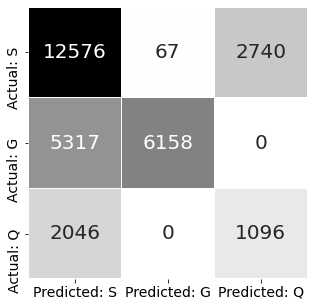

In [49]:
plot_confusion_matrix_1(ada_model.fit(X_sm1,Y_sm1))

In [50]:
results_ada = pd.DataFrame({
    'Ensemble Model Type': ['AdaBoost Classifier'],
    'Accuracy': [metrics.accuracy_score(y_test1, Ada_preds1)*100],
     'Macro F-1 score':[metrics.f1_score(y_test1, Ada_preds1,average='macro')],
     'weighted F-1 score':[metrics.recall_score(y_test1, Ada_preds1,average='weighted')],
      'Macro recall_score':[metrics.recall_score(y_test1, Ada_preds1,average='macro')],
       'weighted recall_score':[metrics.f1_score(y_test1, Ada_preds1,average='weighted')],
       'Macro precision_score':[metrics.precision_score(y_test1, Ada_preds1,average='macro')],
        'weighted precision_score':[metrics.precision_score(y_test1, Ada_preds1,average='weighted')]})

result_df_ada = results_ada
result_df_ada = result_df_ada.set_index('Ensemble Model Type')
result_df_ada

,Accuracy,Macro F-1 score,weighted F-1 score,Macro recall_score,weighted recall_score,Macro precision_score,weighted precision_score
Ensemble Model Type,,,,,,,
AdaBoost Classifier,66.1,0.574009,0.661,0.567664,0.66418,0.635225,0.731721


### 3. XGBoost Classifier

In [51]:
# instantiate the 'XGBClassifier'
# set the maximum depth of the tree using the parameter, 'max_depth'
# pass the value of minimum loss reduction required for partition of the leaf node to the parameter, 'gamma'
xgb_model1 = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model1.fit(X_sm1,Y_sm1)

[16:14:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the XGBoost model to the function
test_report_xgb1 = get_test_report_1(xgb_model1)

# print the performance measures
print(test_report_xgb1)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     15383
         1.0       1.00      1.00      1.00     11475
         2.0       0.97      0.96      0.97      3142

    accuracy                           0.99     30000
   macro avg       0.99      0.99      0.99     30000
weighted avg       0.99      0.99      0.99     30000



In [53]:
y_pred_xgb1 =xgb_model1.predict(X_test1)
print("Accuracy of XGBClassifier = ", metrics.accuracy_score(y_test1,y_pred_xgb1))

Accuracy of XGBClassifier =  0.9927333333333334


In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test1,y_pred_xgb1)

array([[15284,    17,    82],
       [    9, 11466,     0],
       [  109,     1,  3032]], dtype=int64)

[16:15:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


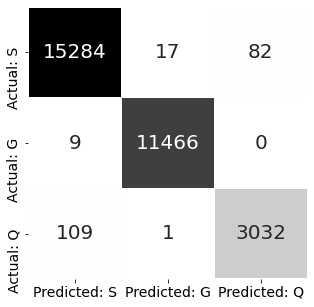

In [55]:
plot_confusion_matrix_1(xgb_model1.fit(X_sm1,Y_sm1))

In [56]:
results_xgb = pd.DataFrame({
    'Ensemble Model Type': ['XGBoost Classifier'],
    'Accuracy': [metrics.accuracy_score(y_test1, y_pred_xgb1)*100],
     'Macro F-1 score':[metrics.f1_score(y_test1, y_pred_xgb1,average='macro')],
     'weighted F-1 score':[metrics.recall_score(y_test1, y_pred_xgb1,average='weighted')],
      'Macro recall_score':[metrics.recall_score(y_test1, y_pred_xgb1,average='macro')],
       'weighted recall_score':[metrics.f1_score(y_test1, y_pred_xgb1,average='weighted')],
       'Macro precision_score':[metrics.precision_score(y_test1, y_pred_xgb1,average='macro')],
        'weighted precision_score':[metrics.precision_score(y_test1, y_pred_xgb1,average='weighted')]})

result_df_xgb = results_xgb
result_df_xgb = result_df_xgb.set_index('Ensemble Model Type')
result_df_xgb

,Accuracy,Macro F-1 score,weighted F-1 score,Macro recall_score,weighted recall_score,Macro precision_score,weighted precision_score
Ensemble Model Type,,,,,,,
XGBoost Classifier,99.273333,0.987028,0.992733,0.985923,0.992721,0.988146,0.992714


# Final Result

In [57]:
Final_Results = pd.DataFrame({ 
    'Model Type': ['KNN Classifier','Random Forest Classifier','AdaBoost Classifier','XGBoost Classifier'],
    
    'Accuracy': [metrics.accuracy_score(y_test1, knc_preds1)*100, 
                 metrics.accuracy_score(y_test1, rfc_preds1)*100, 
                 metrics.accuracy_score(y_test1, Ada_preds1)*100, 
                 metrics.accuracy_score(y_test1, y_pred_xgb1)*100],
                              
     'Macro F-1 score':[metrics.f1_score(y_test1, knc_preds1,average='macro'), 
                        metrics.f1_score(y_test1, rfc_preds1,average='macro'),
                       metrics.f1_score(y_test1, Ada_preds1,average='macro'), 
                        metrics.f1_score(y_test1, y_pred_xgb1,average='macro')],
                              
     'weighted F-1 score':[metrics.recall_score(y_test1, knc_preds1,average='weighted'),
                          metrics.recall_score(y_test1, rfc_preds1,average='weighted'),
                          metrics.recall_score(y_test1, Ada_preds1,average='weighted'),
                          metrics.recall_score(y_test1, y_pred_xgb1,average='weighted')],
                           
      'Macro recall_score':[metrics.recall_score(y_test1, knc_preds1,average='macro'),
                           metrics.recall_score(y_test1, rfc_preds1,average='macro'),
                           metrics.recall_score(y_test1, Ada_preds1,average='macro'),
                           metrics.recall_score(y_test1, y_pred_xgb1,average='macro')],
                           
       'weighted recall_score':[metrics.f1_score(y_test1, knc_preds1,average='weighted'),
                               metrics.f1_score(y_test1, rfc_preds1,average='weighted'),
                               metrics.f1_score(y_test1, Ada_preds1,average='weighted'),
                               metrics.f1_score(y_test1, y_pred_xgb1,average='weighted')],
                           
       'Macro precision_score':[metrics.precision_score(y_test1, knc_preds1,average='macro'),
                               metrics.precision_score(y_test1, rfc_preds1,average='macro'),
                               metrics.precision_score(y_test1, Ada_preds1,average='macro'),
                               metrics.precision_score(y_test1, y_pred_xgb1,average='macro')],
                           
        'weighted precision_score':[metrics.precision_score(y_test1, knc_preds1,average='weighted'),
                                   metrics.precision_score(y_test1, rfc_preds1,average='weighted'),
                                   metrics.precision_score(y_test1, Ada_preds1,average='weighted'),
                                   metrics.precision_score(y_test1, y_pred_xgb1,average='weighted')]})

df_final_results = Final_Results
df_final_results = df_final_results.set_index('Model Type')
df_final_results

,Accuracy,Macro F-1 score,weighted F-1 score,Macro recall_score,weighted recall_score,Macro precision_score,weighted precision_score
Model Type,,,,,,,
KNN Classifier,92.623333,0.924747,0.926233,0.927875,0.926222,0.921776,0.926284
Random Forest Classifier,99.176667,0.985981,0.991767,0.983907,0.991743,0.988102,0.991737
AdaBoost Classifier,66.100000,0.574009,0.661000,0.567664,0.664180,0.635225,0.731721
XGBoost Classifier,99.273333,0.987028,0.992733,0.985923,0.992721,0.988146,0.992714


In [58]:
df_final_results.T

Model Type,KNN Classifier,Random Forest Classifier,AdaBoost Classifier,XGBoost Classifier
Accuracy,92.623333,99.176667,66.100000,99.273333
Macro F-1 score,0.924747,0.985981,0.574009,0.987028
weighted F-1 score,0.926233,0.991767,0.661000,0.992733
Macro recall_score,0.927875,0.983907,0.567664,0.985923
weighted recall_score,0.926222,0.991743,0.664180,0.992721
Macro precision_score,0.921776,0.988102,0.635225,0.988146
weighted precision_score,0.926284,0.991737,0.731721,0.992714


<h1>Conclusion</h1>

<b>Through this notebook, we have analyzed the SDSS data (we learned some very interesting facts about our space along the way), how to build a machine learning model to predict for unseen data from this data set and how to improve its performance (even though there was only a slight improvent). We used XGBoost for predicting and evaluated its result.</b>